Questions:

???????????????????????????????????

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

dfd = pd.read_csv('data/full_data.csv', engine= 'python')
# df.head()

In [12]:
dfd["Status.simple"].unique()

array(['Dysplastic', 'Inflamed', 'Uninflamed'], dtype=object)

In [13]:
from pandas.api.types import is_numeric_dtype
col = ["Status.simple","ImageNumber","ROInr","Cell_Area","Nucl_Area","X80ArAr_Mean","sSMA113_Mean","aSMA_Mean","X124Xe_Mean","X127I_Mean","X129Xe_Mean","X132Xe_Mean","RORgt_Mean","Ecad_Mean","CD20_Mean","GATA3_Mean","GATA3_Nucl_Mean","Tbet_Mean","Tbet_Nucl_Mean","CD16_Mean","BetaCatenin_Mean","PanKeratin_Mean","CTLA4_Mean","PDL1_Mean","IFNg_Mean","CD45RO_Mean","AKT_Mean","HLA_DR-DP-DQ_Mean","FOXP3_Mean","FOXP3_Nucl_Mean","CD4_Mean","CD103_Mean","pSTAT3_Mean","CD68_Mean","IL10_Mean","CD45_Mean","CD8a_Mean","ICOS_Mean","pS6_Mean","PD1_Mean","NFkB_Mean","NFkB_Nucl_Mean","IL17a_Mean","Ki67_Mean","Ki67_Nucl_Mean","GranzymeB_Mean","CD3_Mean","pERK_Mean","Cleaved Caspase 3_Mean","ERK_Mean","TCRgd_Mean","pAKT_Mean","H3_Mean","H3_Nucl_Mean","Ir193_Mean","Ir193_Nucl_Mean","cx", "cy"]

dfd = dfd[col]
for c in dfd.columns[3:]:
    if not is_numeric_dtype(dfd[c]):
        dfd[c] = dfd[c].apply(lambda x: float(x.split()[0].replace(',','.')))

df = dfd[dfd["Status.simple"] == "Dysplastic"].drop("Status.simple", axis=1)

In [14]:
dfn = dfd.copy()
for c in dfn.columns[1:]:
    if is_numeric_dtype(dfn[c]):
        dfn[c] = (dfn[c]-dfn[c].mean())/dfn[c].std()
dfn

,Status.simple,ImageNumber,ROInr,Cell_Area,Nucl_Area,X80ArAr_Mean,sSMA113_Mean,aSMA_Mean,X124Xe_Mean,X127I_Mean,...,Cleaved Caspase 3_Mean,ERK_Mean,TCRgd_Mean,pAKT_Mean,H3_Mean,H3_Nucl_Mean,Ir193_Mean,Ir193_Nucl_Mean,cx,cy
0,Dysplastic,20200731_MBAA047_S11_R-4_D-S11_T59_R1,-0.826798,0.540902,1.024646,-1.210643,-0.543700,-0.749640,-1.111395,-1.120603,...,-0.183386,-0.919227,-0.808559,-0.821013,-1.086637,-1.149848,-0.260842,-0.391412,0.114260,-0.130533
1,Dysplastic,20200731_MBAA047_S11_R-4_D-S11_T59_R1,-0.826596,-1.125167,-0.889237,-1.208242,-0.508413,-0.810904,-0.929994,-1.126718,...,-0.692172,-1.367412,-1.033648,-1.244612,-1.102239,-1.146674,-0.187437,-0.385213,-0.193018,-0.125039
2,Dysplastic,20200731_MBAA047_S11_R-4_D-S11_T59_R1,-0.826393,-0.041219,-0.506461,-1.209043,-0.559370,-0.848500,-1.409939,-1.120446,...,-0.686932,-0.665757,-1.249614,-1.220950,-1.470420,-1.248664,-0.516775,-0.046645,-1.259409,-0.127013
3,Dysplastic,20200731_MBAA047_S11_R-4_D-S11_T59_R1,-0.826191,0.079220,-0.171531,-1.209696,-0.424720,-0.747432,-0.804960,-1.147415,...,-0.479002,-0.895506,-0.923272,-0.587807,-1.202877,-1.353725,-0.082581,-0.238798,-0.940437,-0.120786
4,Dysplastic,20200731_MBAA047_S11_R-4_D-S11_T59_R1,-0.825989,-1.004728,-0.745696,-1.210844,-0.590978,-0.918089,-0.817997,-1.165338,...,-0.477881,-0.719344,-1.050722,-0.942766,-1.249118,-1.317626,0.197937,0.095186,-0.755973,-0.126576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394127,Dysplastic,20210808_MBAA047_S8_R-8_D-S8_T40_R1,0.089529,2.467920,2.794989,-0.559059,-0.217180,0.036819,-0.593725,-0.771449,...,-0.465233,-0.326669,0.000495,-0.566618,-0.175955,-0.096422,-0.612088,-0.695517,-1.296664,-1.386981
394128,Dysplastic,20210808_MBAA047_S8_R-8_D-S8_T40_R1,0.089731,-0.262023,-1.224167,-0.558555,0.507715,1.045121,-0.675103,-0.702888,...,0.337694,-1.157731,-1.117972,-0.831177,-0.981415,-0.518649,-0.976076,-0.721836,-1.180990,-1.385723
394129,Dysplastic,20210808_MBAA047_S8_R-8_D-S8_T40_R1,0.089933,-1.345971,-0.841390,-0.558117,-0.590978,-0.952279,-1.110882,-0.931359,...,-0.548611,-1.757181,-0.948691,-1.191074,-0.606611,-0.900407,-0.858031,-1.218826,-1.472687,-1.389943
394130,Dysplastic,20210808_MBAA047_S8_R-8_D-S8_T40_R1,0.090135,-0.924436,-1.080626,-0.555060,-0.512949,-0.509717,-0.993874,-0.675327,...,-0.690055,-1.102009,0.121897,-0.168513,-0.012292,0.150055,-0.397837,-0.171148,-1.285407,-1.401171


In [15]:
grouped = dfn.groupby('ImageNumber')
# grouped.count()

In [30]:
from sklearn_som.som import SOM
som = SOM(m=3, n=3, dim=56)
maxs = 0
keep = None
t = 50
for name, group in grouped:
    features = group._get_numeric_data().values
    if len(features) > maxs:
        maxs = len(features)
        if keep is not None:
            epoch = len(keep)*t
            som.fit(keep, epochs=epoch)
        keep = features
    else:
        epoch = len(features)*t
        som.fit(features, epochs=epoch)

In [31]:
df1n = keep.copy()
df1n = pd.DataFrame(df1n, columns=col[2:])
df2 = dfd[dfd['ImageNumber'] == '20210808_MBAA047_S8_R-2_D-S8_T42_R4']
# normalize df1
df2n = df2.copy()
for c in df2n.columns:
    if is_numeric_dtype(df2n[c]):
        df2n[c] = (df2n[c]-df2n[c].mean())/df2n[c].std()

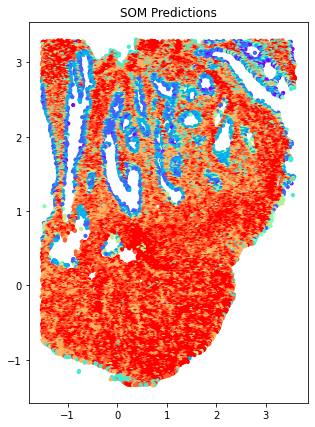

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,7))
x = df1n['cx']
y = df1n['cy']

ax.scatter(x, y, c=som.predict(df1n._get_numeric_data().values), cmap='rainbow', s=10)
ax.title.set_text('SOM Predictions')


plt.show()

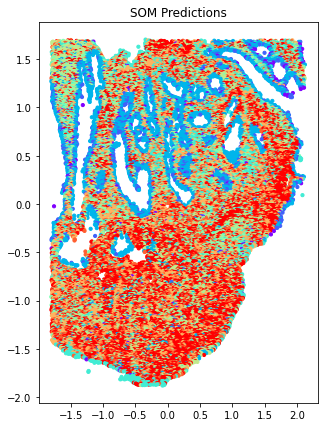

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,7))
x = df2n['cx']
y = df2n['cy']

ax.scatter(x, y, c=som.predict(df2n._get_numeric_data().values), cmap='rainbow', s=10)
ax.title.set_text('SOM Predictions')


plt.show()

array([[<AxesSubplot:title={'center':'aSMA_Mean'}>]], dtype=object)

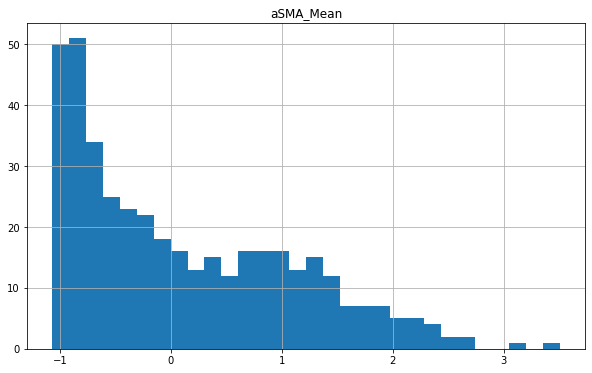

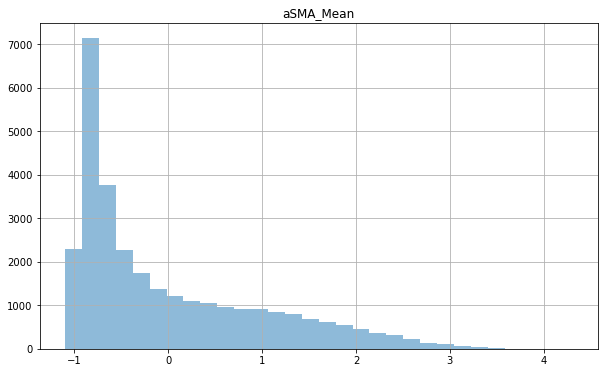

In [34]:
df2n['predictions'] = som.predict(df2n._get_numeric_data().values)

mask = df2n['predictions'] == 0
cluster1 = df2n[mask]
cluster1[["aSMA_Mean"]].hist(bins = 30)
df2n[["aSMA_Mean"]].hist(bins = 30, alpha=0.5)